<a href="https://colab.research.google.com/github/SannyLeeJiaXuan/WMU102-Stroke_Prediction_with_Machine_Learning/blob/main/WMU102_Stroke_Prediction_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Stroke Prediction with Machine Learning**
**Prepared by,**

Lee Jia Xuan, Tang Kui Yang, Yip Juen Yaw **(USM x Skymind)**

---




##**1.0 Introduction**##

**Stroke** is a medical condition when poor blood flow to the brain and cause cell death. **Ischemic Stroke** happens due to the lack of blood flow, while **Hemorrhagic Stroke** happens due to bleeding. Both stroke might cause parts of the brain to stop functioning. (Source: https://en.wikipedia.org/wiki/Stroke)



##**2.0 Problem Statement**##

**Stroke** is one of the leading causes of **mortality** and **disability** worldwide. As of 2016, in Malaysia, stroke accounted for **11,284** cases, with men standing a majority of 55%, especially of aged 60 years or older (60%). On the other hand, age-standardized stroke mortality rates were 103 per 100,000 in men and 97 per 100,000 in women. (Source: https://www.nature.com/articles/s41598-020-68335-1)

Apart from that, according to the Ministry of Health Malaysia (2021), Malaysia records **almost 32 deaths every day due to stroke** and stroke patients are burdened with various morbidities where seven out of 10 stroke patients depend on others to survive. (Source: https://www.thestar.com.my/news/nation/2021/10/29)

With this, **Data Analytics and Machine Learning** was borned to lead in studying a wide myriad of datasets **to visualize the relationship of various health habits to strokes**, and there by assist in the prediction of stroke probability accordingly. In this project, we have proposed a few stroke prediction models and compare their accuracy for better prevention of stroke based on 5 variables / medical disease which leads to stroke, such as hypertension, heart disease, average glucose level, smoking status and BIM.


##**3.0 Data Set**##

For this stroke prediction machine learning project, we choose a dataset from the **medical domain**, Stroke. This machine learning model is proposed and built to **predict patients' stroke probability** by interpreting the variables given.

**Steps Taken:**
1.  Import Necessary Libraries
2.	Read In and Explore the Data
3.	Data Analysis
4.	Data Cleaning 
5.  Data Visualization

[For better presentation, we had also created a flow chart to help us in visualizing the whole data processing](https://app.diagrams.net/#HSannyLeeJiaXuan%2FWMU102-Stroke_Prediction_with_Machine_Learning%2Fmain%2FFlowChart%20-%20Stroke%20Prediction%20Machine%20Learning.drawio)

##**3.1 Import Necessary Libraries**##

To start off, we need to import necessary libraries such as pandas, numpy and seaborn. 

In [ ]:
# Data Manipulation Libraries

import numpy as np # for linear algebra
import pandas as pd # for data processing
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC # "Support vector classifier"
from matplotlib.colors import ListedColormap


Next, we upload the dataset: Stroke_dataset.csv

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Stroke_dataset.csv to Stroke_dataset.csv


##**3.2 Read in and Explore the Data**##

Followed by, we will begin to read in our training and testing data using pd.read_csv and scan through the training data using the describe function, df(). **(TABLE 1)**

In [ ]:
df = pd.read_csv('Stroke_dataset.csv')

In [ ]:
# TABLE 1: READ IN AND EXPLORE THE DATA
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


**Observation:** There are 5110 rows and 12 columns in the stroke prediction dataset. 

###**3.2.1 Dataset**###

Dataset of stroke prediction, taken from 
Fedesoriano, Spain: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

The author had inserted attribute information for each variables in the dataset as shown below. Apart from that, to ensure a better understanding on each variables, we have add-on more description and definition on some variables provided based on similar medical diseases prediction.

*   id: unique identifier (the unique code the author used to identify the respondent)
*   gender: "Male", "Female" or "Other"
*   age: age of the patient (years)
*   hypertension: also known as high blood pressure (mm Hg) (0 if non-hypertension, 1 if hypertension)
*   heart_disease: any disorder that affect heart (0 if no heart diseases, 1 if has heart disease
*   ever_married: marital status ("No" or "Yes")
*   work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
*   Residence_type: "Rural" or "Urban"
*   avg_glucose_level: average glucose level in blood
*   bmi: body mass index (weight in kg/(height in m)2)
*   smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"
*   stroke: 1 if the patient had a stroke or 0 if not

***Note: "Unknown" in smoking_status means that the information is unavailable for this patient***


In [ ]:
# TABLE 2: DATA DESCRIPTION FOR DATA READ IN
df.describe(include="all")

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


###**3.2.2 Data Read in**###

There are a total of 5110 patients in our dataset. **(TABLE 2)**

Meanwhile, it is obvious that there are some **missing data** from the dataset, in which the BMI has only 4909 datas, while the rest is completed with 5110 datas. 

Missing Data asides, with the **mean stroke outcome of 0.0487**, it shows that the dataset skew towards non-stroke which we believe this is an **imbalance dataset.**

Thus, the above considerations would be taken seriously in the following **data analysis & data cleaning** section. 

###**3.2.3 Data Exploration**###

We have also undergo some readings and study to gain some overview on the information provided by the dataset. 

1.   **Gender:** To date, the current proportion of male-female in Malaysia is 50.7% male and 49.3% female. Taking into consideration where there is other factors affecting the data collection, the 2994/5110 (58.59%) Female porpulation, there are **slightly more female respondents in the data.** Meanwhile, the figures could be considered acceptable in this stage. (Source: https://countrymeters.info/en/Malaysia)

2.   **Age:** The average age for stroke patients in Malaysia is around 54.5 and 62.6 years. According to the dataset, the 43.22 considered lower than statistics of Malaysia context. (Source: https://journals.sagepub.com/doi/10.1111/j.1747-4949.2011.00767.x)

3. High Blood Presure **(hypertension)**, diabetes **(avg_glucose_level)** and smoking **(smoking_status)** are the key risk factors for stroke. The outcome from the dataset seems to be true for avg_glucose_level and it is following the general justification. **[FIGURE 1]**

4. Other risk factors are overweight **(bmi)** which is true according to the general view of dataset. (Source: https://www.cdc.gov/chronicdisease/resources/publications/factsheets/heart-disease-stroke.htm)  **[FIGURE 2]**

5. Common heart disorders **(heart_disease)** can increase the risk for stroke. Comparing to the dataset, this outcome for this variable does not being clearly illustrated. (Source: https://www.cdc.gov/stroke/conditions.htm) 

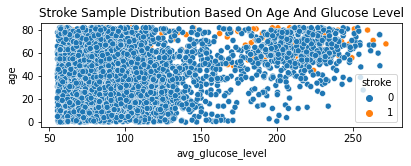

In [ ]:
# FIGURE 1: DATA EXPLORATION
# Since avg_glucose_level is continuous variable, we believe the dataset could be seen much more clearly with scatterplotting. 
plt.subplot(2,1,1)
plt.title('Stroke Sample Distribution Based On Age And Glucose Level')
sns.scatterplot(x=df['avg_glucose_level'],y=df['age'],hue=df['stroke'])
plt.tight_layout()
plt.show()

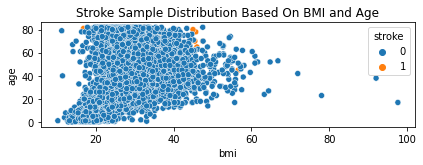

In [ ]:
# FIGURE 2: DATA EXPLORATION
# Since bmi is continuous variable, we believe the dataset could be seen much more clearly with scatterplotting. 
plt.subplot(2,1,1)
plt.title('Stroke Sample Distribution Based On BMI and Age')
sns.scatterplot(x=df['bmi'],y=df['age'],hue=df['stroke'])
plt.tight_layout()
plt.show()

##**3.3 Data Analysis**##

In this section, we will look through the dataset and consider the dataset's features, at the same time, identify the completeness of the dataset. 

***Note: Oversampling or undersampling of data might happen to better increase the accuracy***


Before we move on further, we are going to identify the data types for each features. **(TABLE 3)**

**Numerical Features**: ID (Discrete), Age (Continuous), Hypertension (Discrete), HeartDisease (Discrete), AvgGlucoseLevel (Continuous), BMI (Continuous), Stroke (Discrete)

**Categorical Features**: Gender (String), EverMarried (String), WorkType (String), ResidenceType (String), SmokingStatus (String)

In [ ]:
# TABLE 3: DATA TYPES FOR EACH FEATURES
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


From above,we can see that we have **three float64 (3), four int64 (4) and five object (5)**. Continuous variables are usually of float type while discrete variables are usually of the int type, while the string variables are usually of the object type.

In [ ]:
print(df.columns)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


Now, we will move on in analysing the data. In this stage, we will first identify the **null values which mislead the dataset**. 


In [ ]:
# TABLE 4: Handling Null Values
# data_cleaning_item_1
# check for any other unusable values
print(pd.isnull(df).sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [ ]:
categorical_df=df.copy()
dictionary_of_encodes={}

for column in categorical_df.select_dtypes("object").columns:
    categorical_df[column]=categorical_df[column].astype("category") #Changing dtype.
    dictionary_of_encodes[column]=dict( enumerate(categorical_df[column].cat.categories ) ) #Saving the encoding dictionary.
    categorical_df[column]=categorical_df[column].cat.codes #Encoding the dataframe.
    
categorical_df.dtypes

id                     int64
gender                  int8
age                  float64
hypertension           int64
heart_disease          int64
ever_married            int8
work_type               int8
Residence_type          int8
avg_glucose_level    float64
bmi                  float64
smoking_status          int8
stroke                 int64
dtype: object

From **TABLE 4** above, we can clearly see that the dataset is a partially complete and there is an obvious cleaning process needed for **BMI (with 201 null values out of a total of 5110)**. **(TABLE 4)**

> ***data_cleaning_item_1***: *Remove Null Data*


Apart from that, there is a lot **variables which are believed to be irrelevant to the stroke prediction**. So, we have made decision to drop the irrelevant columns later during the data cleaning. 

>***data_cleaning_item_2***: *Remove Irrelevant Variables*


At the same time, we also noticed several problems that need to be encountered.

Look back to the previous table (TABLE 2), we found that there is alot of 'NaN' or null value which is very unreasonable. We set to find out if there is lots of unreasonable value and null. We shall continue by focusing on data that will directly affect our results.

In [ ]:
# data_cleaning_item_2
# data dropping for the time being
R= df.drop(['id','gender','ever_married','work_type','Residence_type', 'hypertension','heart_disease','stroke'],axis=1)

In [ ]:
R

,age,avg_glucose_level,bmi,smoking_status
0,67.0,228.69,36.6,formerly smoked
1,61.0,202.21,NaN,never smoked
2,80.0,105.92,32.5,never smoked
3,49.0,171.23,34.4,smokes
4,79.0,174.12,24.0,never smoked
...,...,...,...,...
5105,80.0,83.75,NaN,never smoked
5106,81.0,125.20,40.0,never smoked
5107,35.0,82.99,30.6,never smoked
5108,51.0,166.29,25.6,formerly smoked


In [ ]:
#The following code counts the number of non-zero values in each column.
print("Attributes       Number of non-Zeroes")
R.astype(bool).sum(axis=0)

Attributes       Number of non-Zeroes


age                  5110
avg_glucose_level    5110
bmi                  5110
smoking_status       5110
dtype: int64

In [ ]:
#For better presentation, we display also the counts on number of zero in each column
print("Attributes       Number of Zeroes (out of 5000)")
(R == 0).astype(int).sum(axis=0)

Attributes       Number of Zeroes (out of 5000)


age                  0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

So, according to the data analysis above, there isn't any zero values for the data left. With this, we will proceed to data cleaning.


##**3.4 Data Cleaning**##



###**3.4.1 Remove Null Data: Body Mass Index (BMI)**###

Referring to **TABLE 4** in Data Analysis, there are 201 null values out of a total of 5110 rows. Since the number of null values is not high, hence, we decided to drop the entire row with null values.

In [ ]:
df= df.dropna()

In [ ]:
df.describe(include="all")

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4909.000000,4909,4909.000000,4909.000000,4909.000000,4909,4909,4909,4909.000000,4909.000000,4909,4909.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2897,NaN,NaN,NaN,3204,2811,2490,NaN,NaN,1852,NaN
mean,37064.313506,NaN,42.865374,0.091872,0.049501,NaN,NaN,NaN,105.305150,28.893237,NaN,0.042575
std,20995.098457,NaN,22.555115,0.288875,0.216934,NaN,NaN,NaN,44.424341,7.854067,NaN,0.201917
min,77.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,18605.000000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.070000,23.500000,NaN,0.000000
50%,37608.000000,NaN,44.000000,0.000000,0.000000,NaN,NaN,NaN,91.680000,28.100000,NaN,0.000000
75%,55220.000000,NaN,60.000000,0.000000,0.000000,NaN,NaN,NaN,113.570000,33.100000,NaN,0.000000


Now, all the rows with null values are dropped, and the data count is 4909. 

Then, we noticed that the maximum value of 'bmi' is unreasonably high. According to the standard Body Mass Index(BMI) range, BMI greater than 40 is considered morbidly obese which is extremely unhealthy. Therefore, we assume that the **data with 'bmi' greater than 60 is the outlier**. We decided to drop the entire row since the number of rows is not high.

In [ ]:
df.bmi[df.bmi > 60]

270     60.9
358     64.8
466     60.2
544     71.9
928     78.0
1559    66.8
2128    97.6
2764    63.3
2840    61.2
3825    61.6
4188    64.4
4209    92.0
4838    60.9
Name: bmi, dtype: float64

In [ ]:
df = df[df['bmi']<=60]

In [ ]:
df.describe(include="all")

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4896.000000,4896,4896.000000,4896.000000,4896.000000,4896,4896,4896,4896.000000,4896.000000,4896,4896.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2888,NaN,NaN,NaN,3193,2799,2485,NaN,NaN,1847,NaN
mean,37047.735907,NaN,42.867059,0.091095,0.049632,NaN,NaN,NaN,105.315629,28.785396,NaN,0.042688
std,20974.788241,NaN,22.573087,0.287773,0.217206,NaN,NaN,NaN,44.423584,7.555344,NaN,0.202173
min,77.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,18602.500000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.080000,23.500000,NaN,0.000000
50%,37544.500000,NaN,44.000000,0.000000,0.000000,NaN,NaN,NaN,91.680000,28.000000,NaN,0.000000
75%,55138.500000,NaN,60.000000,0.000000,0.000000,NaN,NaN,NaN,113.495000,33.000000,NaN,0.000000


Now, all the rows with 'bmi' greater than 60 are dropped, and the data count is 4896.

Data cleaning for column 'bmi' is done.

### **3.4.2 Encode Smoking_Status**

We had also encode the Smoking_status from strings to float by setting the different status to 0, 1, 2 and 3. [from **FIGURE 3** to **FIGURE 4** ] This will ease the process of model choosing later. 

0 - formerly smoked; 1 - never smoked; 2 - smokes; 3 - Unknown

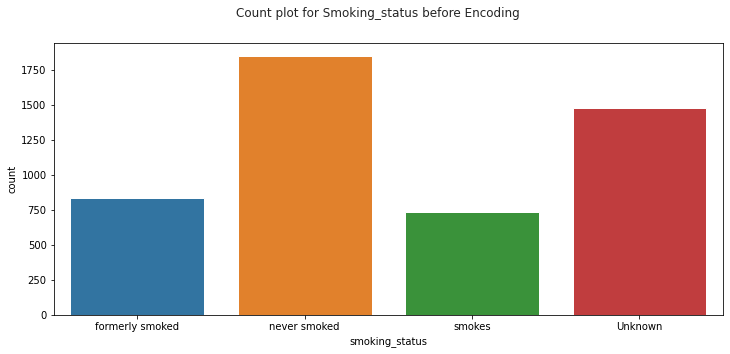

In [ ]:
#FIGURE 3: Count Plot for Smoking Status before Encoding
fig,axes = plt.subplots(1,1,figsize = (12,5))
sns.set_style('whitegrid')
fig.suptitle("Count plot for Smoking_status before Encoding")

sns.countplot(data=df,x='smoking_status')


plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder 
label_encoder = LabelEncoder()
X_encoded = df['smoking_status'].values
X_encoded = label_encoder.fit_transform(X_encoded)
df.drop('smoking_status', axis=1)
df['smoking_status'] = X_encoded

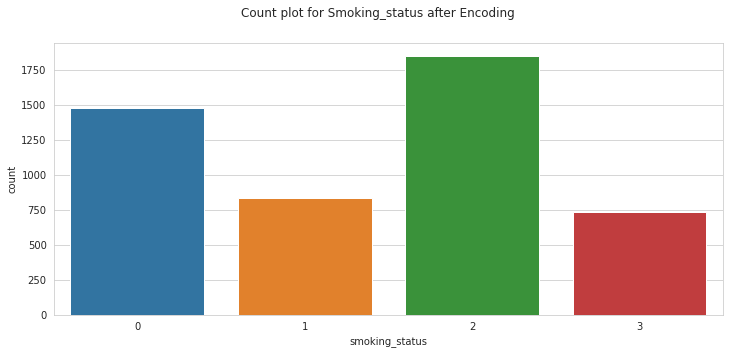

In [ ]:
# FIGURE 4: Count Plot for Smoking Status after Encoding
fig,axes = plt.subplots(1,1,figsize = (12,5))
sns.set_style('whitegrid')
fig.suptitle("Count plot for Smoking_status after Encoding")

sns.countplot(data=df,x='smoking_status')

plt.show()

### **3.4.3 Removing Irrelevant Variables**

In [ ]:
df = df.drop(['id','gender','ever_married','work_type','Residence_type'],axis=1)

In [ ]:
df.describe(include="all")

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
count,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000
mean,42.867059,0.091095,0.049632,105.315629,28.785396,1.374592,0.042688
std,22.573087,0.287773,0.217206,44.423584,7.555344,1.066818,0.202173
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,77.080000,23.500000,0.000000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.000000,2.000000,0.000000
75%,60.000000,0.000000,0.000000,113.495000,33.000000,2.000000,0.000000
max,82.000000,1.000000,1.000000,271.740000,59.700000,3.000000,1.000000


The purpose that we dropped 'id','gender','ever_married','work_type','Residence_type' is because they are irrelevant and not the primary factors for the prediction model. 

**Primary variables**: 'age', 'hypertension','heart_disease','avg_glucose_level', 'bmi', 'smoking_status' **[6 variables]**

**Secondary**: id','gender','ever_married','work_type','Residence_type', 

**Outcome**: 'stroke'

The **primary variables are important** and we can't drop them. It can leads to **direct factor** which cause stroke to a human. Meanwhile, the **secondary variables** are not the main reasons that lead to stroke. 

Apart from the 2 items (Null Data for BMI and Irrelevant Data), we found out that the rest of the data is acceptable and can be used for the model.

##**3.5 Data Visualisation**##

To start off, here is the complicated yet comprehensive visualization of the dataset. **[FIGURE 5]**

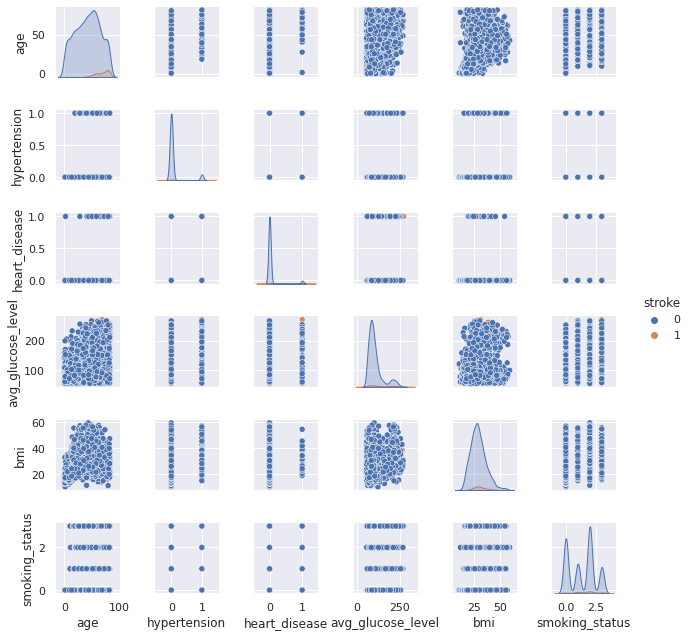

In [ ]:
# FIGURE 5
# Complicated yet comprehensive visualization of data distribution. =)
%matplotlib inline
sns.set()
sns.pairplot(df, hue='stroke', height=1.5);

### **3.5.1 Predictions**

Moving on, some predictions are made: 

* The patients with higher age has more risk to stroke. 
* The patient with hypertension are predicted to have higher chance of developing stroke.
* The patients with heart disease are predicted to have higher risk of getting stroke. 
* Patient will higher blood glucose level has higher tendency to have stroke. 
* High BMI will increase the risk of stroke.
* Patients who smoke will have higher risk to stroke

Thus, from these predictions, **FIGURE 6** illustrated the visualization of data to check if our predictions are correct. 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

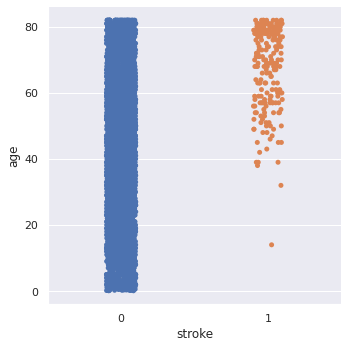

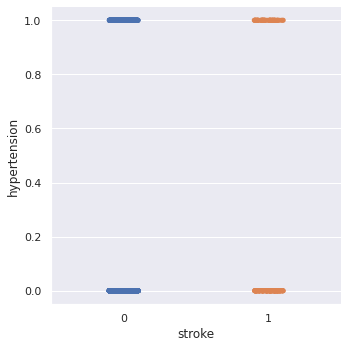

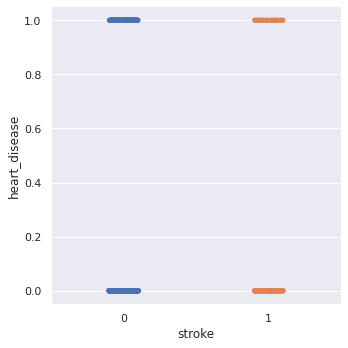

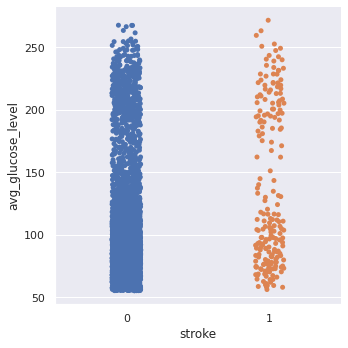

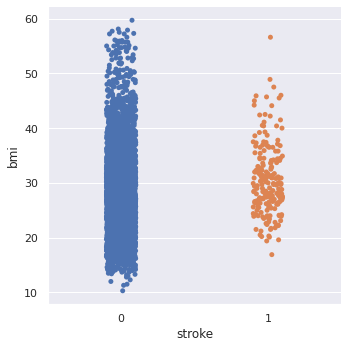

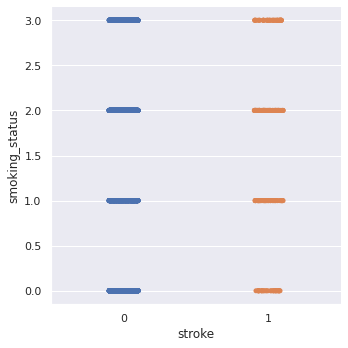

In [ ]:
# FIGURE 6
#This is used to visualize our data and to check whether our predictions are accurate.
for col in df.columns:
  if col != "stroke":
      sns.catplot("stroke", col, 
               data = df)

**Age**: From the graph, we could see that there is more distribution of stroke patients (Orange Dots) among the higher age group patients. This shows that our prediction is true.

**Hypertension**: From the graph, it shows that with or without hypertension, the distribution of stroke patient is about the same. This might show that our prediction is not accurate. 

**Heart disease**: Similar to hypertension, the graph for heart disease shows that with or without heart disease, the distribution of stroke patient is about the same. Our prediction is not accurate. 

**Average glucose level**: From the graph, we could see there is more orange dot distribution on the glucose level (50 - 100). This is contrasted to our predictions above. 

**BMI**: From the graph, the orange dot is distributed more on BMI (20 - 40), which can be considered as low BMI. This is again different with our predictions which might to due to several reasons from the dataset. 

**Smoking Status**: From the graph, we could see that the orange dot is slightly less for 0 (formally smoke) patient, while the rest (1, 2 and 3) are having almost equal distribution. Our prediction is false also. 
 



From the analysis and comparison with the predictions above, we found some difference between the results with assumption made before data cleaning.

Thus, after consideration, we decided not to make any changes on data cleaning.

##**4.0 Choosing the Best Model**##

Testing Different Models

Supervised learning uses a training set to teach models to yield the desired output. Classification uses an algorithm to accurately assign test data into specific categories (source: https://www.ibm.com/cloud/learn/supervised-learning).

We will be testing the following models with our training data:



*   KNN or k-Nearest Neighbors
*   Decision Tree Classifier
*   Gaussian Naive Bayes
*   Random Forest Classifier
*   Support Vector Machines Algorithm (SVM)


Now, we split the dataset into training and test set.

In [ ]:
X= df.drop(['stroke'],axis=1)

In [ ]:
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status
0,67.0,0,1,228.69,36.6,1
2,80.0,0,1,105.92,32.5,2
3,49.0,0,0,171.23,34.4,3
4,79.0,1,0,174.12,24.0,2
5,81.0,0,0,186.21,29.0,1
...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,0
5106,81.0,0,0,125.20,40.0,2
5107,35.0,0,0,82.99,30.6,2
5108,51.0,0,0,166.29,25.6,1


In [ ]:
y=df['stroke']

In [ ]:
y

0       1
2       1
3       1
4       1
5       1
       ..
5104    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 4896, dtype: int64

In [ ]:
#Import Module
# We create our training and testing datasets with a train_test_split method
# At the moment train set size will be 70% of the data and test set size 30%
from sklearn.model_selection import train_test_split


train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size=0.3,
                                                    random_state=250)

In [ ]:
train_X.shape, test_X.shape

((3427, 6), (1469, 6))

The training set consists of 3427 rows, while the test set consists of 1469 rows.The ratio of training set: test set is 7:3.

In [ ]:
train_X

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status
1727,60.0,0,0,61.94,27.9,1
1247,50.0,0,0,103.48,29.1,3
4618,33.0,0,0,107.47,26.7,2
3363,61.0,0,0,81.25,43.4,3
4118,41.0,0,0,146.08,29.9,2
...,...,...,...,...,...,...
2129,50.0,1,0,220.36,40.9,1
1865,29.0,0,0,72.52,33.9,2
2390,60.0,0,0,85.13,24.6,0
2774,50.0,0,0,82.10,26.4,0


In [ ]:
test_X

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status
4263,81.0,1,0,117.77,27.1,2
165,78.0,0,0,133.19,23.6,1
2447,65.0,0,0,74.50,32.0,2
3526,79.0,0,0,74.36,39.2,0
4775,42.0,0,0,58.35,24.3,2
...,...,...,...,...,...,...
4476,47.0,0,1,101.81,28.4,3
1705,19.0,0,0,110.70,38.5,2
5091,59.0,1,0,95.05,30.9,2
455,13.0,0,0,92.14,23.2,2


In [ ]:
train_y.shape, test_y.shape

((3427,), (1469,))

In [ ]:
train_y

1727    0
1247    0
4618    0
3363    0
4118    0
       ..
2129    0
1865    0
2390    0
2774    0
2013    0
Name: stroke, Length: 3427, dtype: int64

In [ ]:
test_y

4263    0
165     1
2447    0
3526    0
4775    0
       ..
4476    0
1705    0
5091    0
455     0
974     0
Name: stroke, Length: 1469, dtype: int64

##**4.1 KNN or k-Nearest Neighbors**##

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#import metrics model to check the accuracy 
from sklearn import metrics

#Try running from k=1 through 10 and record testing accuracy
k_range = range(1,11)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(train_X, train_y)
    pred_1 = knn.predict(test_X)
    scores[k] = metrics.accuracy_score(test_y, pred_1)
    scores_list.append(metrics.accuracy_score(test_y, pred_1))

In [ ]:
print("-------------------------------")
print("k-value |     Test Accuracy")
print("-------------------------------")
for a,b in zip(k_range, scores_list):
  print(a, "\t|  ", b)
print("-------------------------------")

-------------------------------
k-value |     Test Accuracy
-------------------------------
1 	|   0.9264805990469708
2 	|   0.9516678012253234
3 	|   0.9455411844792376
4 	|   0.955071477195371
5 	|   0.9516678012253234
6 	|   0.955071477195371
7 	|   0.953710006807352
8 	|   0.9557522123893806
9 	|   0.9557522123893806
10 	|   0.9557522123893806
-------------------------------


Text(0, 0.5, 'Testing Accuracy')

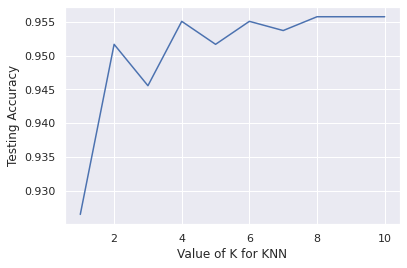

In [ ]:
#We plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

From the result, we choose k = 3 since we opt to choose odd number with highest accuracy while excluding 1.

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# We can ask the model to directly calculate the accuracy
knn.score(train_X, train_y)

0.9644003501604902

In [ ]:
knn.score(test_X,test_y)

0.9455411844792376

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# We can also let the model predict the values for the test set
pred_1 = knn.predict(test_X)
print(pred_1[:10])

[0 0 0 0 0 0 0 0 0 0]


In [ ]:
# And calculate the accuracy
print("Accuracy:", accuracy_score(test_y, pred_1))

Accuracy: 0.9455411844792376


In [ ]:
# Report for other classification measures
print("Classification report:")
print(classification_report(test_y, pred_1))

Classification report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1404
           1       0.14      0.05      0.07        65

    accuracy                           0.95      1469
   macro avg       0.55      0.52      0.52      1469
weighted avg       0.92      0.95      0.93      1469



**Note:**

 

*   The **recall** means "how many of this class you find over the whole number of element of this class"
*   The **precision** will be "how many are correctly classified among that class"
*   The **f1-score** is the harmonic mean between precision & recall
*   The **support** is the number of occurence of the given class in your dataset






In [ ]:
# And the confusion matrix
print("Confusion matrix:")
print(confusion_matrix(test_y, pred_1))

Confusion matrix:
[[1386   18]
 [  62    3]]


KNN is not a good model for the prediction. It is acceptable to give wrong prediction of labelling a non-stroke person stroke, however, labelling a diabeic person as non-stroke can have serious consequences. This may be due to an imbalanced dataset skewing towards non-stroke.

Text(0.5, 257.44, 'Predicted label')

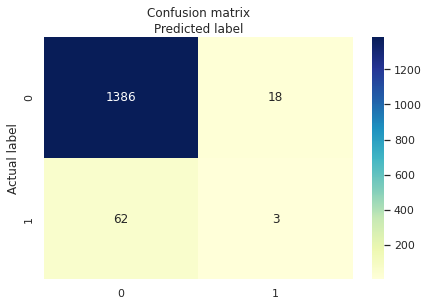

In [ ]:
cnf_matrix = metrics.confusion_matrix(test_y, pred_1)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Note:** A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class.

[[TN FP]

[FN TP]]



*   TP: True postive
*   TN: True negative
*   FP: False positive
*   FN: False Negative


## **4.2 Decision Tree Classifier**##

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve
from sklearn import metrics

In [ ]:
dtc=DecisionTreeClassifier()

In [ ]:
dtc=dtc.fit(train_X,train_y)

In [ ]:
pred_2=dtc.predict(test_X)

In [ ]:
print(pred_2[:10])

[0 1 0 0 0 0 0 0 0 0]


In [ ]:
print("Accuracy:", accuracy_score(test_y, pred_2))

Accuracy: 0.9094622191967324


In [ ]:
# Report for other classification measures
print("Classification report:")
print(classification_report(test_y, pred_2))

Classification report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1404
           1       0.11      0.15      0.13        65

    accuracy                           0.91      1469
   macro avg       0.54      0.55      0.54      1469
weighted avg       0.92      0.91      0.92      1469



In [ ]:
# And the confusion matrix
print("Confusion matrix:")
print(confusion_matrix(test_y, pred_2))

Confusion matrix:
[[1326   78]
 [  55   10]]


Text(0.5, 257.44, 'Predicted label')

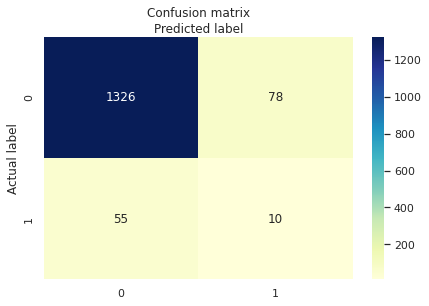

In [ ]:
cnf_matrix = metrics.confusion_matrix(test_y, pred_2)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## **4.3 Gaussian Naive Bayes**##

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb=GaussianNB()

In [ ]:
nb.fit(train_X,train_y)

GaussianNB()

In [ ]:
pred_3=nb.predict(test_X)

In [ ]:
print(pred_3[:10])

[1 0 0 0 0 1 0 0 0 0]


In [ ]:
print("Accuracy:", accuracy_score(test_y, pred_3))

Accuracy: 0.8604492852280463


In [ ]:
# Report for other classification measures
print("Classification report:")
print(classification_report(test_y, pred_3))

Classification report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      1404
           1       0.13      0.37      0.19        65

    accuracy                           0.86      1469
   macro avg       0.55      0.63      0.56      1469
weighted avg       0.93      0.86      0.89      1469



In [ ]:
# And the confusion matrix
print("Confusion matrix:")
print(confusion_matrix(test_y, pred_3))

Confusion matrix:
[[1240  164]
 [  41   24]]


Text(0.5, 257.44, 'Predicted label')

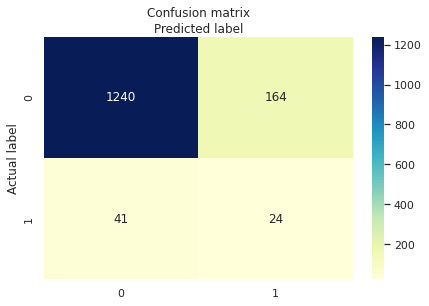

In [ ]:
cnf_matrix = metrics.confusion_matrix(test_y, pred_3)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

##**4.4 Random Forest Classifier**##

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
ran=RandomForestClassifier(n_estimators=100)

In [ ]:
ran.fit(train_X,train_y)

RandomForestClassifier()

In [ ]:
pred_4=ran.predict(test_X)

In [ ]:
print(pred_4[:10])

[0 0 0 0 0 0 0 0 0 0]


In [ ]:
print("Accuracy:", accuracy_score(test_y, pred_4))

Accuracy: 0.953710006807352


In [ ]:
# Report for other classification measures
print("Classification report:")
print(classification_report(test_y, pred_4))

Classification report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1404
           1       0.00      0.00      0.00        65

    accuracy                           0.95      1469
   macro avg       0.48      0.50      0.49      1469
weighted avg       0.91      0.95      0.93      1469



In [ ]:
# And the confusion matrix
print("Confusion matrix:")
print(confusion_matrix(test_y, pred_4))

Confusion matrix:
[[1401    3]
 [  65    0]]


Text(0.5, 257.44, 'Predicted label')

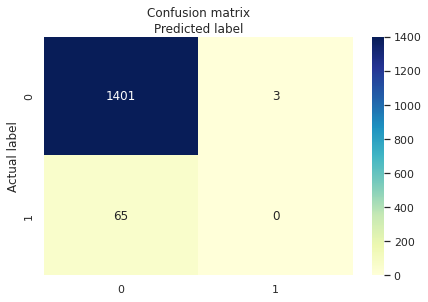

In [ ]:
cnf_matrix = metrics.confusion_matrix(test_y, pred_4)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

##**4.5 Support Vector Machine Algorithm (SVM)**##

Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine.

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
svm_pipeline = Pipeline(steps = [('scale',StandardScaler()),('SVM',SVC(random_state=42, probability=True))])

In [ ]:
from sklearn.metrics import confusion_matrix

svm_pipeline.fit(train_X,train_y);
svm_train_predict = svm_pipeline.predict(train_X)
svm_pred = svm_pipeline.predict(test_X)
svm_cm = confusion_matrix(train_y,svm_train_predict)
svm_cm

array([[3283,    0],
       [ 144,    0]])

Auc :  0.38725619110234494


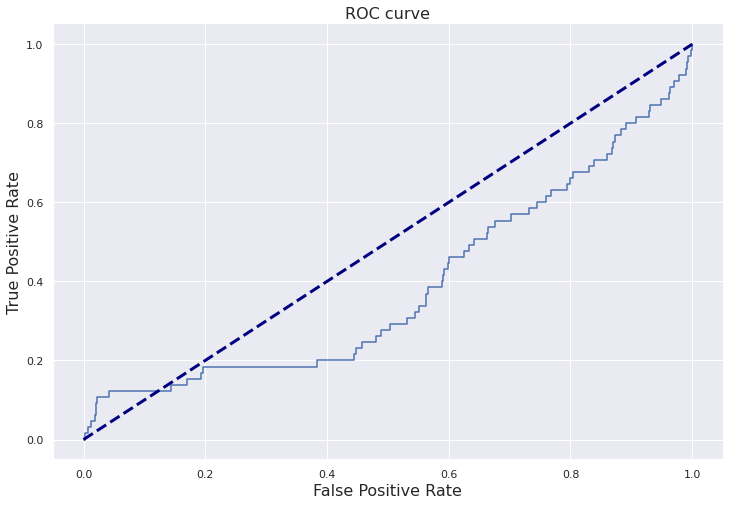

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr_lr, tpr_lr, _ = roc_curve(test_y, svm_pipeline.predict_proba(test_X)[:,1])

plt.figure(figsize=(12,8));

plt.plot(fpr_lr, tpr_lr);
plt.xlabel('False Positive Rate', fontsize=16);
plt.ylabel('True Positive Rate', fontsize=16);
plt.title('ROC curve', fontsize=16);
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--');
#plt.axes().set_aspect('equal');
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False);

print('Auc : ', auc(fpr_lr, tpr_lr))

In [ ]:
pred_5 = svm_pipeline.predict(test_X)

In [ ]:
print(pred_5[:10])

[0 0 0 0 0 0 0 0 0 0]


In [ ]:
print("Accuracy:", accuracy_score(test_y, pred_5))

Accuracy: 0.9557522123893806


In [ ]:
pred_5 = svm_pipeline.predict(test_X)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score
print(classification_report(test_y, pred_5))

print('Accuracy Score: ',accuracy_score(test_y,pred_5))
print('F1 Score: ',f1_score(test_y,pred_5))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1404
           1       0.00      0.00      0.00        65

    accuracy                           0.96      1469
   macro avg       0.48      0.50      0.49      1469
weighted avg       0.91      0.96      0.93      1469

Accuracy Score:  0.9557522123893806
F1 Score:  0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 257.44, 'Predicted label')

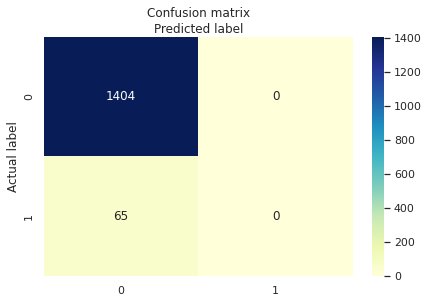

In [ ]:
cnf_matrix = metrics.confusion_matrix(test_y,pred_5)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

##**4.6 Comparing the accuracy of five different models**##

In [ ]:
models = pd.DataFrame({
    'Model': [ 'KNN', 'Decision Tree','Naive Bayes', 'Random Forest', 'Support Vector Machine'],
    'Accuracy': [accuracy_score(test_y, pred_1), accuracy_score(test_y, pred_2), accuracy_score(test_y, pred_3), accuracy_score(test_y, pred_4), accuracy_score(test_y,pred_5)]})
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
4,Support Vector Machine,0.955752
3,Random Forest,0.953710
0,KNN,0.945541
1,Decision Tree,0.909462
2,Naive Bayes,0.860449


##**5.0 Discussion**##

### **Comparison between Models**

**K-Nearest Neighbour(KNN), Decision Tree, Naive Bayes Classifier, Random Forest and Support Vector Machine Algorithm (SVM)** are common examples of supervised machine learning. These algorithms consist of an outcome variable that is to be predicted from a given set of predictors(independent variables).

**K-nearest neighbour (KNN) algorithm -** KNN algorithm is a simple and easy-to-implement algorithm that can be used for both classification and regression problems. It stores all available cases and classifies new cases by a majority vote of its k neighbors(the 'k' is a parameter that refers to the number of nearest neighbors to include in the majority of the voting process). In short, it assumes the similarity between the new data and available data then puts the new data into the category that is most similar to the available categories. Despite its simplicity, its accuracy is ranked third among the five selected algorithms in stroke prediction.

**Decision Tree Classification -** The decision tree is a type of supervised learning algorithm that is mostly used for classification problems. It works for both categorical and continuous dependent variables. In this technique, the data will be split into two or more homogeneous sets based on the most significant differentiator in input variables. The source set will be spilt into subsets based on an attribute value test. This process is repeated on each derived subset in a recursive manner called recursive partitioning. The recursion is completed when the subset at a node all has the same value of the target variable, or when splitting no longer adds value to the predictions. In general decision tree classifier has good accuracy and results from cross-validation experiments on a data set suggest this approach may be effectively applied to large sets of data. Decision tree induction is a typical inductive approach to learning knowledge on classification. However, in this stroke prediction, the accuracy of decision tree is slightly lower than other algorithms except for Naive Bayes Classifier. 

**Naive Bayes Classifier -** Naive Bayes is a classification technique based on Bayes' theorem with an assumption of independence between predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature but they contribute equally to the outcome. However, this assumption of independent predictor limited the usage of the Naive Bayes as it is almost impossible to obtain a set of predictors which are completely independent in real life. In our case, variables such as 'Smoking status' may not be a strong predictor of stroke, but the Naive Bayes classifier would still consider all variables to independently contribute to the probability of stroke even if the variable might depend on each other or upon the existence of the other variable. Not to mention that the Naive Bayes Classifier does not perform very well on imbalanced datasets.Therefore, the accuracy of the Naive Bayes Classifier is lower compared to other algorithms in this prediction as the dataset is quite unbalanced.

**Random Forest -** Random Forest is a trademarked term for an ensemble of decision trees. As the name suggests, a random forest consists of many decision trees. Rather than depending on one 'tree', it takes the prediction from each 'tree' and based on the majority votes of predictions, predicts the final output. In other words, in order to classify a new object based on attributes, each 'tree' gives a classification and literally votes for that class. In the end, the forest chooses the classification having the most votes as the final output(over all the trees in the forest). Therefore, the random forests generally outperform the decision trees in terms of accuracy. Not to mention that the combination of many decision trees may eventually produce a low bias and low variance model. In thise stroke prediction, the accuracy of random forest is second highest compared to other algorithm.

**Support Vector Machine Algorithm (SVM) -** SVM algorithm could find a hyperplane in an N-dimensional space that distinctly classifies the data points. It creates the best line or decision boundary that can segregate n-dimensional space into classes so that the new data can be pointed in the correct category. SVM is highly preferred in supervised machine learning because it may produce significant accuracy with less computation power.

**In this stroke prediction, the SVM algorithm works the best as it gives the highest accuracy when predicting stroke.**

##**6.0 Model Deployment**##

For model deployment, we propose the model to be deployed using the web application such as Heroku. Heroku is a container-based cloud Platform as a Service (PaaS). There are several reasons for that:

*   Heroku offers a ready-to-use environment that allows us to deploy our code fast
*   Heroku is best suitable for Startups model like ours


**Here are the Basic Steps for the Deployment**

1. Train model. 
2. Create web app using Flask.
3. Commit the code in GitHub.
4. Create an account in Heroku.
5. Link GitHub to Heroku.
6. Deploy the model.

##**7.0 Conclusion**##

To conclude, stroke is a serious issue that happen in this modern days. Meanwhile, prevention could be done with help of data analytics and machine learning. In this project, 5 classifications methods are studied and their accuracies are compared, in which **Support Vector Machine Algorithm (SVM) has the highest accuracy (0.955752)**, followed by Random Forest Classifier (0.953710), KNN	(0.945541), Decision Tree Classifier (0.919673) and last but not least Naive Bayes	(0.860449). It can be concluded that **SVM is the best model for classification task**. 

**Further exploration** can be done to propose a wholesome prediction which includes several **stroke disease's symtoms analysis tool** and further leading the patients using an **AI health advisor**. Future research should be done to improve the dataset as well as working on predicting and classifying the different types of stroke, this is believed to better increase the accuracy of stroke prediction in the future. 

###**Limitation**

There is no doubt a number of limitation in this machine learning due to the constraints we faced and the shortcomings from the dataset itself. 

*   The dataset is an **imbalance dataset** as the data provided skew towards non-stroke. 
*   We are unable to predict the **type of strokes** due to the limitation of dataset
*   There is also **limitation to the variables** of the dataset.  


###**Impacts**

Admist all the hype around Machine Learning, we strongly agree that Machine Learning is one of the best applications that can be used for prediction. It is able to **handle a multi-dimensional and multi-variety of data** (for example in our case, there is a total of 5110 data) which seems to be impossible for manual data handling. 

Apart from that, by introducing a high accuracy prediction model, machine learning could be implement in predicting and forecasting patient's health issues, but also help in continuously monitoring the patient's status. It is believed that as the machine learning algorithms gain its experience, it will keep imporving in accuracy and efficiency. 



---



/ - **THE END** - /

Thank you =)